##Algoritmo de Clasificación: Random Forest

###Consigna:

Implementar al menos uno de los algoritmos de clasificación vistos en la sesión del martes 26/07 con el dataset propuesto para el proyecto final del curso.

####Recomendaciones: 
- Basarse en los entregables anteriores para la resolución de la presente actividad
- Realizar una comparación de los modelos obtenidos y su performance
- Sería de mucha utilidad aplicar más de un método de clasificación


In [1]:
#Importamos las Librerías:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from pandas.io.formats.format import DataFrameRenderer

In [2]:
#Determinamos cuántas columnas y rows queremos que nos muestre por defecto:

pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

In [3]:
#Importamos el dataset:

data = pd.read_csv("https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv")

df = pd.DataFrame(data)

##Info del dataset

***Object (28)*** 

1. Customer_id: ID del Cliente
2. Interaction: Identificaciones únicas relacionadas con transacciones de clientes, soporte técnico e inscripciones
3. City: Ciudad de residencia del cliente que figura en el estado de cuenta
4. State: Estado de residencia del cliente como se indica en el estado de cuenta
5. County: Condado de residencia del cliente como se indica en el estado de cuenta
6. Area: Tipo de área (rural, urbana, suburbana), según datos del censo
7. Timezone: Zona horaria de residencia del cliente basada en la información de registro del cliente
8. Job: Ocupación del cliente como se indica en la información de registro
9. Education: Grado de educación más alto obtenido por el cliente según lo declarado en la información de registro
10. Employment: Estado de empleo del cliente según lo declarado en la información de registro
11. Marital: Estado civil del cliente según lo indicado en la información de registro
12. Gender: Autopercepción del cliente como hombre, mujer o no binario
13. Churn: : El cliente interrumpió el servicio en el último mes (sí/no)
14. Techie: El cliente se considera tecnológico (según el cuestionario del cliente cuando se inscribió en los servicios) (sí/no)
15. Contract: Plazo del contrato del cliente (mes a mes, un año, dos años)
16. Port_modem: El cliente tiene un módem portátil (sí/no)
17. Tablet: El cliente posee una tableta como iPad, Surface, etc. (sí/no)
18. InternetService: Proveedor de servicios de Internet del cliente (DSL, fibra óptica, Ninguno)
19. Phone: El cliente tiene servicio telefónico (sí/no)
20. Multiple: El cliente tiene varias líneas (sí/no)
21. OnlineSecurity: El cliente tiene un complemento de seguridad online (sí/no)
22. OnlineBackup: El cliente tiene un complemento de copia de seguridad online (sí/no)
23. DeviceProtection: El cliente tiene un complemento de protección de dispositivos (sí/no)
24. TechSupport: El cliente tiene un complemento de soporte técnico (sí/no)
25. StreamingTV: El cliente tiene servicio de transmisión de TV (sí/no)
26. StreamingMovies: El cliente tiene películas en streaming (sí/no)
27. PaperlessBilling: El cliente tiene facturación electrónica (sí/no)
28. PaymentMethod: Método de pago del cliente (cheque electrónico, cheque enviado por correo, banco (transferencia bancaria automática), tarjeta de crédito (automática))


***Int64 (14)***

 1. CaseOrder: Variable de marcador de posición para conservar el orden original del archivo de datos sin procesar
 2. Zip: Código Postal de residencia del cliente que figura en el estado de cuenta
 3. Population: Población dentro de un radio de una milla del cliente, según datos del censo
 4. Email: Cantidad de correos electrónicos enviados al cliente en el último año (marketing o correspondencia)
 5. Contacts: Número de veces que el cliente se comunicó con el soporte técnico
 6. Yearly_equip_failure: Cantidad de veces que el equipo del cliente falló y tuvo que reiniciarse/reemplazarse en el último año

Las siguientes variables, representan las respuestas a una encuesta de ocho preguntas, en las que se pide a los clientes que califiquen la importancia de varios factores en una escala del 1 al 8 (1 = más importante, 8 = menos importante):

7. Item1: Respuesta oportuna
8. Item2: Reparaciones oportunas
9. Item3: Reemplazos oportunos
10. Item4: Fiabilidad
11. Item5: Opciones
12. Item6: Respuesta respetuosa
13. Item7: Intercambio cortés
14. Item8: Evidencia de escucha activa


***Float64 (9)***

1. Lat: Coordenada de latitud de la residencia del cliente (GPS), que figura en el estado de cuenta
2. Lng: Coordenada de longitud de la residencia del cliente (GPS), que figura en el estado de cuenta
3. Children: Cantidad de niños en el hogar del cliente según lo informado en el registro
4. Age: Edad del cliente según lo informado en el registro
5. Income: Ingreso anual del cliente según lo informado en el momento del registro
6. Outage_sec_perweek: Promedio de segundos por semana de interrupciones del sistema en el vecindario del cliente
7. Tenure: Número de meses que el cliente se ha quedado con el proveedor
8. MonthlyCharge: Importe cobrado al cliente mensualmente. Este valor refleja un promedio por cliente
9. Bandwidth_GB_Year: Cantidad promedio de datos utilizados (GB), en un año por el cliente

In [4]:
#Función para pasar a minúsculas los string de una lista o array:

def to_lowercase(arr):
 new_arr = []
 for x in list(range(0,len(arr))):
   new = arr[x].lower()
   new_arr.append(new)
 return new_arr

In [5]:
#Función para extraer el primer dígito de una lista o array:

def getFirstDigit(num):
    while num >= 10:
        num = int(num/10)
    return num

In [6]:
#Convertimos mayúsculas en minúsculas:

col_names = to_lowercase(df.columns.values)

df.set_axis(col_names,axis='columns',inplace=True)

df.columns.values

array(['unnamed: 0', 'caseorder', 'customer_id', 'interaction', 'city',
       'state', 'county', 'zip', 'lat', 'lng', 'population', 'area',
       'timezone', 'job', 'children', 'age', 'education', 'employment',
       'income', 'marital', 'gender', 'churn', 'outage_sec_perweek',
       'email', 'contacts', 'yearly_equip_failure', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'paymentmethod', 'tenure', 'monthlycharge',
       'bandwidth_gb_year', 'item1', 'item2', 'item3', 'item4', 'item5',
       'item6', 'item7', 'item8'], dtype=object)

In [7]:
#Eliminamos las variables que no nos interesan:

df.drop(['unnamed: 0','caseorder','customer_id', 'interaction', 'city', 'state', 'county', 'population', 'lat', 'lng', 'timezone', 'job', 'education', 'employment', 'email'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zip                   10000 non-null  int64  
 1   area                  10000 non-null  object 
 2   children              7505 non-null   float64
 3   age                   7525 non-null   float64
 4   income                7510 non-null   float64
 5   marital               10000 non-null  object 
 6   gender                10000 non-null  object 
 7   churn                 10000 non-null  object 
 8   outage_sec_perweek    10000 non-null  float64
 9   contacts              10000 non-null  int64  
 10  yearly_equip_failure  10000 non-null  int64  
 11  techie                7523 non-null   object 
 12  contract              10000 non-null  object 
 13  port_modem            10000 non-null  object 
 14  tablet                10000 non-null  object 
 15  internetservice     

In [9]:
#Creamos nuevas variables que cuentan la cantidad de cada tipo de servicios y el total de servicios que los clientes contratan:

df['q_online_serv'] = df.internetservice.apply(lambda x: 1 if x in ['Fiber Optic', 'DSL'] else 0).values + df.onlinesecurity.apply(lambda x: 1 if x == 'Yes' else 0).values + df.onlinebackup.apply(lambda x: 1 if x == 'Yes' else 0).values+df.techsupport.apply(lambda x: 1 if x== 'Yes' else 0).values
df['q_phone_serv']=df.phone.apply(lambda x: 1 if x == 'Yes' else 0).values+df.deviceprotection.apply(lambda x: 1 if x == 'Yes' else 0).values
df['q_streaming'] = df.streamingtv.apply(lambda x:1 if x=='Yes' else 0).values + df.streamingmovies.apply(lambda x:1 if x=='Yes'else 0).values

df['q_total_serv']= df['q_online_serv'].values+df['q_phone_serv'].values+df['q_streaming'].values


df[['q_online_serv','q_phone_serv','q_total_serv', 'q_streaming']]

,q_online_serv,q_phone_serv,q_total_serv,q_streaming
0,3,1,5,1
1,2,1,5,2
2,1,1,3,1
3,2,1,4,1
4,2,0,3,1
...,...,...,...,...
9995,2,1,3,0
9996,3,1,5,1
9997,3,1,4,0
9998,2,0,4,2


In [10]:
#Creamos una variable que unifica los valores obtenidos en la encuesta:

df['total_encuesta']=df.item1.values+df.item2.values+df.item3.values+df.item4.values+df.item5.values+df.item6.values+df.item7.values+df.item8.values
df['total_encuesta']

0       33
1       28
2       27
3       29
4       32
        ..
9995    23
9996    34
9997    33
9998    33
9999    21
Name: total_encuesta, Length: 10000, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zip                   10000 non-null  int64  
 1   area                  10000 non-null  object 
 2   children              7505 non-null   float64
 3   age                   7525 non-null   float64
 4   income                7510 non-null   float64
 5   marital               10000 non-null  object 
 6   gender                10000 non-null  object 
 7   churn                 10000 non-null  object 
 8   outage_sec_perweek    10000 non-null  float64
 9   contacts              10000 non-null  int64  
 10  yearly_equip_failure  10000 non-null  int64  
 11  techie                7523 non-null   object 
 12  contract              10000 non-null  object 
 13  port_modem            10000 non-null  object 
 14  tablet                10000 non-null  object 
 15  internetservice     

In [12]:
#Creamos la variable zip_zone agrupando los zip teniendo en cuenta su primer dígito que indica una de las 9 zonas generales de EEUU:

df['zip_zone'] = df.zip.apply(lambda x: getFirstDigit(x))
df.groupby('zip_zone').count()

,zip,area,children,age,income,marital,gender,churn,outage_sec_perweek,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,item1,item2,item3,item4,item5,item6,item7,item8,q_online_serv,q_phone_serv,q_streaming,q_total_serv,total_encuesta
zip_zone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1216,1216,908,916,911,1216,1216,1216,1216,1216,1216,922,1216,1216,1216,1216,1067,1216,1216,1216,1216,1108,1216,1216,1216,1216,1082,1216,1100,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216
2,1177,1177,903,897,903,1177,1177,1177,1177,1177,1177,901,1177,1177,1177,1177,1057,1177,1177,1177,1177,1054,1177,1177,1177,1177,1081,1177,1064,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177
3,1140,1140,868,878,853,1140,1140,1140,1140,1140,1140,852,1140,1140,1140,1140,1016,1140,1140,1140,1140,1043,1140,1140,1140,1140,1039,1140,1023,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140
4,1228,1228,926,925,899,1228,1228,1228,1228,1228,1228,941,1228,1228,1228,1228,1117,1228,1228,1228,1228,1112,1228,1228,1228,1228,1102,1228,1101,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228
5,1170,1170,877,885,875,1170,1170,1170,1170,1170,1170,867,1170,1170,1170,1170,1046,1170,1170,1170,1170,1058,1170,1170,1170,1170,1061,1170,1058,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170
6,1183,1183,849,862,904,1183,1183,1183,1183,1183,1183,872,1183,1183,1183,1183,1066,1183,1183,1183,1183,1059,1183,1183,1183,1183,1099,1183,1064,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183
7,1236,1236,948,898,933,1236,1236,1236,1236,1236,1236,934,1236,1236,1236,1236,1104,1236,1236,1236,1236,1097,1236,1236,1236,1236,1116,1236,1109,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236
8,710,710,537,528,521,710,710,710,710,710,710,523,710,710,710,710,645,710,710,710,710,627,710,710,710,710,637,710,629,710,710,710,710,710,710,710,710,710,710,710,710,710
9,940,940,689,736,711,940,940,940,940,940,940,711,940,940,940,940,856,940,940,940,940,851,940,940,940,940,852,940,831,940,940,940,940,940,940,940,940,940,940,940,940,940


In [13]:
#Eliminamos las variables que no necesitamos:

df.drop(['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'zip'],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  10000 non-null  object 
 1   children              7505 non-null   float64
 2   age                   7525 non-null   float64
 3   income                7510 non-null   float64
 4   marital               10000 non-null  object 
 5   gender                10000 non-null  object 
 6   churn                 10000 non-null  object 
 7   outage_sec_perweek    10000 non-null  float64
 8   contacts              10000 non-null  int64  
 9   yearly_equip_failure  10000 non-null  int64  
 10  techie                7523 non-null   object 
 11  contract              10000 non-null  object 
 12  port_modem            10000 non-null  object 
 13  tablet                10000 non-null  object 
 14  internetservice       10000 non-null  object 
 15  phone               

In [15]:
#Selección de variables Categóricas:

cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(include=np.number).columns

In [16]:
#Chequeo de dimensionalidad de variables Categóricas:

lista = []
for col in cat_columns:
  info = (col, df[col].nunique(), df[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['Feature', 'Cantidad', 'Valores'])

,Feature,Cantidad,Valores
0,area,3,"[Urban, Suburban, Rural]"
1,marital,5,"[Widowed, Married, Separated, Never Married, D..."
2,gender,3,"[Male, Female, Prefer not to answer]"
3,churn,2,"[No, Yes]"
4,techie,2,"[No, Yes, nan]"
5,contract,3,"[One year, Month-to-month, Two Year]"
6,port_modem,2,"[Yes, No]"
7,tablet,2,"[Yes, No]"
8,internetservice,3,"[Fiber Optic, DSL, None]"
9,phone,2,"[Yes, No, nan]"


Como en las variables Categóricas la dimensionalidad es baja, las transformaremos con One Hot Encoding.

#Random Forest

### Generación de modelos

1. Primer spliteo: identificamos X (input) e Y (target)
2. Segundo spliteo: identificamos Train y Test
3. Transformación de valores de preproceso para el Train dataset
4. Entrenamiento 
5. Transformación del Test dataset en base a las transformaciones hechas en Train
6. Predicción
7. Métricas

In [17]:
#1. Spliteamos el target:

X = df.drop("churn", axis=1)
y = df["churn"]

In [18]:
#2. Spliteamos Training y Test:

X_train , X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42, stratify=y)

In [19]:
#3. Hacemos las transformaciones en el df Train (llenado de nulos, transformaciones de variables Categóricas con OHE, o transformaciones de variables Numéricas):

In [20]:
#A. Verificamos los nulos:

X_train.isnull().sum()

area                       0
children                2028
age                     1992
income                  1983
marital                    0
gender                     0
outage_sec_perweek         0
contacts                   0
yearly_equip_failure       0
techie                  2016
contract                   0
port_modem                 0
tablet                     0
internetservice            0
phone                    817
multiple                   0
onlinesecurity             0
onlinebackup               0
deviceprotection           0
techsupport              801
streamingtv                0
streamingmovies            0
paperlessbilling           0
paymentmethod              0
tenure                   738
monthlycharge              0
bandwidth_gb_year        801
q_online_serv              0
q_phone_serv               0
q_streaming                0
q_total_serv               0
total_encuesta             0
zip_zone                   0
dtype: int64

In [21]:
#children: Llenamos los nulos con la Mediana de la agrupación gender y marital:

#Creamos dataframe de referencia 1:
gend_marit1_ref_null = X_train.groupby(['gender', 'marital']).median()['children'].reset_index()

#Función de replace en base a dataframe agrupado:
def fill_na_gend_marit1_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['children']):
    return df_grouped[(df_grouped['gender'] == row_replace['gender']) & (df_grouped['marital'] == row_replace['marital'])]['children'].values[0]
  else:
    return row_replace['children']

#Transformamos Train:
X_train['children'] = X_train.apply(lambda row: fill_na_gend_marit1_grouped(gend_marit1_ref_null, row), axis=1)

In [22]:
#age: Llenamos los nulos con la Mediana de la agrupación gender y marital:

#Creamos dataframe de referencia 2:
gend_marit2_ref_null = X_train.groupby(['gender', 'marital']).median()['age'].reset_index()

#Función de replace en base a dataframe agrupado:
def fill_na_gend_marit2_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['age']):
    return df_grouped[(df_grouped['gender'] == row_replace['gender']) & (df_grouped['marital'] == row_replace['marital'])]['age'].values[0]
  else:
    return row_replace['age']

#Transformamos Train:
X_train['age'] = X_train.apply(lambda row: fill_na_gend_marit2_grouped(gend_marit2_ref_null, row), axis=1)

In [23]:
#income: Llenamos los nulos con la Mediana de la agrupación gender y marital:

#Creamos dataframe de referencia 3:
gend_marit3_ref_null = X_train.groupby(['gender', 'marital']).median()['income'].reset_index()

#Función de replace en base a dataframe agrupado:
def fill_na_gend_marit3_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['income']):
    return df_grouped[(df_grouped['gender'] == row_replace['gender']) & (df_grouped['marital'] == row_replace['marital'])]['income'].values[0]
  else:
    return row_replace['income']

#Transformamos Train:
X_train['income'] = X_train.apply(lambda row: fill_na_gend_marit3_grouped(gend_marit3_ref_null, row), axis=1)

In [24]:
#bandwidth_gb_year: Llenamos los nulos con la Mediana de la agrupación contract y q_total_serv:

#Creamos dataframe de referencia:
cont_tot_ref_null = X_train.groupby(['contract', 'q_total_serv']).median()['bandwidth_gb_year'].reset_index()

#Función de replace en base a dataframe agrupado:
def fill_na_cont_tot_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['bandwidth_gb_year']):
    return df_grouped[(df_grouped['contract'] == row_replace['contract']) & (df_grouped['q_total_serv'] == row_replace['q_total_serv'])]['bandwidth_gb_year'].values[0]
  else:
    return row_replace['bandwidth_gb_year']

#Transformamos Train:
X_train['bandwidth_gb_year'] = X_train.apply(lambda row: fill_na_cont_tot_grouped(cont_tot_ref_null, row), axis=1)

In [25]:
#Invocamos los Dataframe de referencia:
#gend_marit1_ref_null
#gend_marit2_ref_null
#gend_marit3_ref_null
#cont_tot_ref_null

In [26]:
#techie, phone y techsupport: Llenamos los nulos con "NS/NC" (No Sabe/No Contesta):

X_train['techie'].fillna('NS/NC', inplace=True)
X_train['phone'].fillna('NS/NC', inplace=True)
X_train['techsupport'].fillna('NS/NC', inplace=True)

#tenure: Llenamos los nulos con 0 (tienen menos de 1 mes):

X_train['tenure'].fillna(0, inplace=True)

In [27]:
#Corroboramos que ya no haya nulos en Train:

X_train.isnull().sum()

area                    0
children                0
age                     0
income                  0
marital                 0
gender                  0
outage_sec_perweek      0
contacts                0
yearly_equip_failure    0
techie                  0
contract                0
port_modem              0
tablet                  0
internetservice         0
phone                   0
multiple                0
onlinesecurity          0
onlinebackup            0
deviceprotection        0
techsupport             0
streamingtv             0
streamingmovies         0
paperlessbilling        0
paymentmethod           0
tenure                  0
monthlycharge           0
bandwidth_gb_year       0
q_online_serv           0
q_phone_serv            0
q_streaming             0
q_total_serv            0
total_encuesta          0
zip_zone                0
dtype: int64

In [28]:
#Selección de variables Categóricas:

cat_columns = X_train.select_dtypes(include='object').columns

In [29]:
#Variables Categóricas a transformar con One Hot Encoding:

cat_columns

Index(['area', 'marital', 'gender', 'techie', 'contract', 'port_modem',
       'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [30]:
#B. Transformamos las variables Categóricas con One Hot Encoding:

#Generamos el One Hot Encoder class:
encoder = OneHotEncoder(handle_unknown='ignore',
                        sparse=False)

#Entrenamiento para generar el preprocesamiento One Hot Encoding para las variables indicadas:
encoder.fit(X_train[['area', 'marital', 'gender', 'techie', 'contract', 'port_modem', 'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod']])

#Transformamos en Train datasets en base a la clase generada:
cat_encoding = pd.DataFrame(encoder.transform(X_train[['area', 'marital', 'gender', 'techie', 'contract', 'port_modem', 'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod']]), columns=encoder.get_feature_names(['area', 'marital', 'gender', 'techie', 'contract', 'port_modem', 'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod']))
cat_encoding.head()

,area_Rural,area_Suburban,area_Urban,marital_Divorced,marital_Married,marital_Never Married,marital_Separated,marital_Widowed,gender_Female,gender_Male,gender_Prefer not to answer,techie_NS/NC,techie_No,techie_Yes,contract_Month-to-month,contract_One year,contract_Two Year,port_modem_No,port_modem_Yes,tablet_No,tablet_Yes,internetservice_DSL,internetservice_Fiber Optic,internetservice_None,phone_NS/NC,phone_No,phone_Yes,multiple_No,multiple_Yes,onlinesecurity_No,onlinesecurity_Yes,onlinebackup_No,onlinebackup_Yes,deviceprotection_No,deviceprotection_Yes,techsupport_NS/NC,techsupport_No,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank Transfer(automatic),paymentmethod_Credit Card (automatic),paymentmethod_Electronic Check,paymentmethod_Mailed Check
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
#Reseteamos el index para poder concatenarlo con el dataframe de los cat_encoding:

X_train.reset_index(inplace = True, drop=True)
y_train.reset_index(inplace = True, drop=True)

In [32]:
#Joineamos las variables Numéricas con las Categóricas encoding:

X_train_all = pd.concat([X_train, cat_encoding], axis=1)

#Borramos las columnas Categóricas que ya no necesitamos:
X_train_all.drop(['area', 'marital', 'gender', 'techie', 'contract', 'port_modem', 'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod'],axis=1, inplace=True)

#Train dataset final:
X_train_all.head()

,children,age,income,outage_sec_perweek,contacts,yearly_equip_failure,tenure,monthlycharge,bandwidth_gb_year,q_online_serv,q_phone_serv,q_streaming,q_total_serv,total_encuesta,zip_zone,area_Rural,area_Suburban,area_Urban,marital_Divorced,marital_Married,marital_Never Married,marital_Separated,marital_Widowed,gender_Female,gender_Male,gender_Prefer not to answer,techie_NS/NC,techie_No,techie_Yes,contract_Month-to-month,contract_One year,contract_Two Year,port_modem_No,port_modem_Yes,tablet_No,tablet_Yes,internetservice_DSL,internetservice_Fiber Optic,internetservice_None,phone_NS/NC,phone_No,phone_Yes,multiple_No,multiple_Yes,onlinesecurity_No,onlinesecurity_Yes,onlinebackup_No,onlinebackup_Yes,deviceprotection_No,deviceprotection_Yes,techsupport_NS/NC,techsupport_No,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank Transfer(automatic),paymentmethod_Credit Card (automatic),paymentmethod_Electronic Check,paymentmethod_Mailed Check
0,1.0,53.0,50217.94,11.248430,1,0,67.503790,158.139000,5730.434000,1,1,0,2,31,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2.0,34.0,32331.80,9.187158,0,0,2.246214,183.115900,632.476000,2,1,1,4,29,8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,66.0,43551.35,7.606199,1,0,2.405575,170.993772,901.287715,1,2,1,4,37,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3.0,87.0,80780.17,15.449400,0,0,6.038648,223.131100,1477.559000,3,1,2,6,29,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,55.0,18849.08,9.583048,0,0,59.978050,169.876600,5464.593000,1,0,1,2,28,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [33]:
X_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   children                                8000 non-null   float64
 1   age                                     8000 non-null   float64
 2   income                                  8000 non-null   float64
 3   outage_sec_perweek                      8000 non-null   float64
 4   contacts                                8000 non-null   int64  
 5   yearly_equip_failure                    8000 non-null   int64  
 6   tenure                                  8000 non-null   float64
 7   monthlycharge                           8000 non-null   float64
 8   bandwidth_gb_year                       8000 non-null   float64
 9   q_online_serv                           8000 non-null   int64  
 10  q_phone_serv                            8000 non-null   int6

In [34]:
#Transformamos la variable Y (target) con One Hot Encoder:

y_encode = OneHotEncoder(handle_unknown='ignore', sparse=False,dtype='int')
y_encoding = y_encode.fit_transform(pd.DataFrame(y_train))

y_encoding= pd.DataFrame(y_encoding, columns=y_encode.get_feature_names_out())

y_train_transform = y_encoding.drop(columns='churn_No')

In [35]:
#C. Hacemos las transformaciones Numéricas:

numeric_encoder = MinMaxScaler()
numeric_encoder.fit(X_train_all)
x_minmax = numeric_encoder.transform(X_train_all)
#x_minmax = numeric_encoder.fit_transform(df_all_train)
pd.DataFrame(x_minmax)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,0.1,0.492958,0.191654,0.260280,0.142857,0.000000,0.937562,0.338267,0.796023,0.25,0.5,0.0,0.250,0.56250,0.750,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.2,0.225352,0.122370,0.217690,0.000000,0.000000,0.031198,0.443047,0.068105,0.50,0.5,0.5,0.500,0.50000,0.875,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.1,0.676056,0.165830,0.185024,0.142857,0.000000,0.033411,0.392194,0.106487,0.25,1.0,0.5,0.500,0.75000,0.500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.3,0.971831,0.310038,0.347081,0.000000,0.000000,0.083871,0.610915,0.188771,0.75,0.5,1.0,0.750,0.50000,0.875,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.1,0.521127,0.070144,0.225870,0.000000,0.000000,0.833037,0.387507,0.758065,0.25,0.0,0.5,0.250,0.46875,0.250,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.8,0.535211,0.133385,0.250800,0.142857,0.000000,0.868086,0.457693,0.820556,0.00,1.0,1.0,0.500,0.37500,0.750,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7996,0.1,0.338028,0.124322,0.277283,0.142857,0.166667,0.043377,0.489587,0.102751,0.50,1.0,0.5,0.625,0.46875,0.125,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7997,0.2,0.492958,0.016415,0.233031,0.142857,0.000000,0.858973,0.469945,0.803026,0.25,1.0,1.0,0.625,0.50000,0.625,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7998,0.3,0.492958,0.185416,0.201743,0.142857,0.166667,0.738745,0.594254,0.705376,0.25,0.0,1.0,0.375,0.34375,0.625,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
#4. Entrenamos:

#Creamos el clasificador:

classifier = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-3)

#Entrenamos el modelo usando el conjunto de entranamiento:

classifier.fit(X_train_all, y_train_transform)

RandomForestRegressor(n_jobs=-3, random_state=42)

In [37]:
#5. Transformamos el Test en base a las transformaciones hechas en Train:

In [38]:
#A. Verificamos los nulos:

X_test.isna().sum()[X_test.isna().sum()>0]

children             467
age                  483
income               507
techie               461
phone                209
techsupport          190
tenure               193
bandwidth_gb_year    220
dtype: int64

In [39]:
#children: Llenamos los nulos con la Mediana de la agrupación gender y marital:

#Creamos dataframe de referencia 1:
gend_marit1_ref_null = X_test.groupby(['gender', 'marital']).median()['children'].reset_index()

#Función de replace en base a dataframe agrupado:
def fill_na_gend_marit1_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['children']):
    return df_grouped[(df_grouped['gender'] == row_replace['gender']) & (df_grouped['marital'] == row_replace['marital'])]['children'].values[0]
  else:
    return row_replace['children']

#Transformamos Test:
X_test['children'] = X_test.apply(lambda row: fill_na_gend_marit1_grouped(gend_marit1_ref_null, row), axis=1)

In [40]:
#age: Llenamos los nulos con la Mediana de la agrupación gender y marital:

#Creamos dataframe de referencia 2:
gend_marit5_ref_null = X_test.groupby(['gender', 'marital']).median()['age'].reset_index()

#Función de replace en base a dataframe agrupado:
def fill_na_gend_marit2_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['age']):
    return df_grouped[(df_grouped['gender'] == row_replace['gender']) & (df_grouped['marital'] == row_replace['marital'])]['age'].values[0]
  else:
    return row_replace['age']

#Transformamos Test:
X_test['age'] = X_test.apply(lambda row: fill_na_gend_marit2_grouped(gend_marit2_ref_null, row), axis=1)

In [41]:
#income: Llenamos los nulos con la Mediana de la agrupación gender y marital:

#Creamos dataframe de referencia 3:
gend_marit3_ref_null = X_test.groupby(['gender', 'marital']).median()['income'].reset_index()

#Función de replace en base a dataframe agrupado:
def fill_na_gend_marit3_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['income']):
    return df_grouped[(df_grouped['gender'] == row_replace['gender']) & (df_grouped['marital'] == row_replace['marital'])]['income'].values[0]
  else:
    return row_replace['income']

#Transformamos Test:
X_test['income'] = X_test.apply(lambda row: fill_na_gend_marit3_grouped(gend_marit3_ref_null, row), axis=1)

In [42]:
#bandwidth_gb_year: Llenamos los nulos con la Mediana de la agrupación contract y q_total_serv:

#Creamos dataframe de referencia:
cont_tot_ref_null = X_test.groupby(['contract', 'q_total_serv']).median()['bandwidth_gb_year'].reset_index()

#Función de replace en base a dataframe agrupado:
def fill_na_cont_tot_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['bandwidth_gb_year']):
    return df_grouped[(df_grouped['contract'] == row_replace['contract']) & (df_grouped['q_total_serv'] == row_replace['q_total_serv'])]['bandwidth_gb_year'].values[0]
  else:
    return row_replace['bandwidth_gb_year']

#Transformamos Test:
X_test['bandwidth_gb_year'] = X_test.apply(lambda row: fill_na_cont_tot_grouped(cont_tot_ref_null, row), axis=1)

In [43]:
#Invocamos los Dataframe de referencia:
#gend_marit1_ref_null
#gend_marit2_ref_null
#gend_marit3_ref_null
#cont_tot_ref_null

In [44]:
#techie, phone y techsupport: Llenamos los nulos con "NS/NC" (No Sabe/No Contesta):

X_test['techie'].fillna('NS/NC', inplace=True)
X_test['phone'].fillna('NS/NC', inplace=True)
X_test['techsupport'].fillna('NS/NC', inplace=True)

#tenure: Llenamos los nulos con 0 (tienen menos de 1 mes):

X_test['tenure'].fillna(0, inplace=True)

In [45]:
X_test.isna().sum()[X_test.isna().sum()>0]

bandwidth_gb_year    1
dtype: int64

In [46]:
nulo = X_test[X_test['bandwidth_gb_year'].isnull()]

nulo

,area,children,age,income,marital,gender,outage_sec_perweek,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,q_online_serv,q_phone_serv,q_streaming,q_total_serv,total_encuesta,zip_zone
8159,Urban,1.0,22.0,10588.62,Separated,Male,10.76833,4,0,NS/NC,Two Year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Credit Card (automatic),0.0,257.9845,NaN,4,2,2,8,17,6


In [47]:
#Llenamos el nulo que quedó en bandwidth_gb_year luego de la transformación, con la Mediana: 

nulo = X_test.bandwidth_gb_year.median()
X_test.bandwidth_gb_year.fillna(nulo, inplace=True)

In [48]:
#Corroboramos que ya no haya nulos en Train:

X_test.isna().sum()[X_test.isna().sum()>0]

Series([], dtype: int64)

In [49]:
#Selección de variables Categóricas:

cat_columns = X_test.select_dtypes(include='object').columns

In [50]:
#Variables Categóricas a transformar con One Hot Encoding:

cat_columns

Index(['area', 'marital', 'gender', 'techie', 'contract', 'port_modem',
       'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [51]:
#B. Transformamos las variables Categóricas con One Hot Encoding:

#Generamos el One Hot Encoder class:
encoder = OneHotEncoder(handle_unknown='ignore',
                        sparse=False)

#Entrenamiento para generar el preprocesamiento One Hot Encoding para las variables indicadas:
encoder.fit(X_test[['area', 'marital', 'gender', 'techie', 'contract', 'port_modem', 'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod']])

#Transformamos en Test datasets en base a la clase generada:
cat_encoding_test = pd.DataFrame(encoder.transform(X_test[['area', 'marital', 'gender', 'techie', 'contract', 'port_modem', 'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod']]), columns=encoder.get_feature_names(['area', 'marital', 'gender', 'techie', 'contract', 'port_modem', 'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod']))
cat_encoding_test.head()

,area_Rural,area_Suburban,area_Urban,marital_Divorced,marital_Married,marital_Never Married,marital_Separated,marital_Widowed,gender_Female,gender_Male,gender_Prefer not to answer,techie_NS/NC,techie_No,techie_Yes,contract_Month-to-month,contract_One year,contract_Two Year,port_modem_No,port_modem_Yes,tablet_No,tablet_Yes,internetservice_DSL,internetservice_Fiber Optic,internetservice_None,phone_NS/NC,phone_No,phone_Yes,multiple_No,multiple_Yes,onlinesecurity_No,onlinesecurity_Yes,onlinebackup_No,onlinebackup_Yes,deviceprotection_No,deviceprotection_Yes,techsupport_NS/NC,techsupport_No,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank Transfer(automatic),paymentmethod_Credit Card (automatic),paymentmethod_Electronic Check,paymentmethod_Mailed Check
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [52]:
#Reseteamos el index para poder concatenarlo con el dataframe de los cat_encoding:

X_test.reset_index(inplace = True, drop=True)
y_test.reset_index(inplace = True, drop=True)

In [53]:
#Joineamos las variables Numéricas con las Categóricas encoding:

X_test_all = pd.concat([X_test, cat_encoding_test], axis=1)

#Borramos las columnas Categóricas que ya no necesitamos:
X_test_all.drop(['area', 'marital', 'gender', 'techie', 'contract', 'port_modem', 'tablet', 'internetservice', 'phone', 'multiple', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod'],axis=1, inplace=True)

#Train dataset final:
X_test_all.head()

,children,age,income,outage_sec_perweek,contacts,yearly_equip_failure,tenure,monthlycharge,bandwidth_gb_year,q_online_serv,q_phone_serv,q_streaming,q_total_serv,total_encuesta,zip_zone,area_Rural,area_Suburban,area_Urban,marital_Divorced,marital_Married,marital_Never Married,marital_Separated,marital_Widowed,gender_Female,gender_Male,gender_Prefer not to answer,techie_NS/NC,techie_No,techie_Yes,contract_Month-to-month,contract_One year,contract_Two Year,port_modem_No,port_modem_Yes,tablet_No,tablet_Yes,internetservice_DSL,internetservice_Fiber Optic,internetservice_None,phone_NS/NC,phone_No,phone_Yes,multiple_No,multiple_Yes,onlinesecurity_No,onlinesecurity_Yes,onlinebackup_No,onlinebackup_Yes,deviceprotection_No,deviceprotection_Yes,techsupport_NS/NC,techsupport_No,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank Transfer(automatic),paymentmethod_Credit Card (automatic),paymentmethod_Electronic Check,paymentmethod_Mailed Check
0,2.0,65.0,31896.60,8.187512,0,1,0.00000,211.2015,6265.225,2,2,2,6,31,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,86.0,43810.04,4.092838,0,0,27.44938,203.7760,2573.594,2,2,1,5,27,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,47.0,62285.30,6.611597,1,0,70.78918,104.9185,6336.619,2,1,0,3,31,9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,84.0,73795.85,11.754540,0,3,67.31311,108.0913,5646.558,2,2,0,4,32,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.0,24.0,31101.73,8.719714,0,1,59.28333,176.6471,5634.805,3,2,1,6,23,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
X_test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   children                                2000 non-null   float64
 1   age                                     2000 non-null   float64
 2   income                                  2000 non-null   float64
 3   outage_sec_perweek                      2000 non-null   float64
 4   contacts                                2000 non-null   int64  
 5   yearly_equip_failure                    2000 non-null   int64  
 6   tenure                                  2000 non-null   float64
 7   monthlycharge                           2000 non-null   float64
 8   bandwidth_gb_year                       2000 non-null   float64
 9   q_online_serv                           2000 non-null   int64  
 10  q_phone_serv                            2000 non-null   int6

In [55]:
#Transformamos la variable Y (target) con One Hot Encoder:

y_encode_test = OneHotEncoder(handle_unknown='ignore', sparse=False,dtype='int')
y_encoding_test = y_encode.fit_transform(pd.DataFrame(y_test))

y_encoding_test = pd.DataFrame(y_encoding_test, columns=y_encode.get_feature_names_out())

y_test_transform = y_encoding_test.drop(columns='churn_No')

In [56]:
#C. Hacemos las transformaciones Numéricas:

numeric_encoder = MinMaxScaler()
numeric_encoder.fit(X_test_all)
x_minmax = numeric_encoder.transform(X_test_all)
#x_minmax = numeric_encoder.fit_transform(df_all_train)
pd.DataFrame(x_minmax)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,0.2,0.661972,0.196353,0.198204,0.0,0.333333,0.000000,0.603271,0.881931,0.50,1.0,1.0,0.750,0.551724,1.000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.1,0.957746,0.271947,0.110819,0.0,0.000000,0.381797,0.569398,0.347834,0.50,1.0,0.5,0.625,0.413793,0.375,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.1,0.408451,0.389178,0.164572,0.2,0.000000,0.984616,0.118450,0.892260,0.50,0.5,0.0,0.375,0.551724,1.000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.929577,0.462215,0.274328,0.0,1.000000,0.936267,0.132923,0.792424,0.50,1.0,0.0,0.500,0.586207,0.500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.8,0.084507,0.191309,0.209562,0.0,0.333333,0.824580,0.445647,0.790723,0.75,1.0,0.5,0.750,0.275862,0.500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.1,0.633803,0.218130,0.050438,0.0,0.000000,0.035209,0.216011,0.088889,0.50,1.0,0.0,0.500,0.586207,0.625,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1996,0.1,0.394366,0.374290,0.106018,0.0,0.000000,0.540393,0.358315,0.608014,0.25,0.5,0.0,0.250,0.448276,0.875,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1997,0.7,0.478873,0.137272,0.259342,0.4,0.666667,0.950614,0.599955,0.895162,0.50,0.5,1.0,0.625,0.586207,0.375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1998,0.1,1.000000,0.068342,0.172327,0.0,0.000000,0.155833,0.306814,0.108485,0.25,0.5,0.0,0.250,0.275862,0.375,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [57]:
#6. Predicción:

y_pred = classifier.predict(X_test_all)

In [58]:
X_test['pred']= y_pred
X_test['target']= y_test_transform
X_test.head()

,area,children,age,income,marital,gender,outage_sec_perweek,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,q_online_serv,q_phone_serv,q_streaming,q_total_serv,total_encuesta,zip_zone,pred,target
0,Urban,2.0,65.0,31896.60,Married,Male,8.187512,0,1,Yes,Two Year,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Mailed Check,0.00000,211.2015,6265.225,2,2,2,6,31,9,0.08,0
1,Suburban,1.0,86.0,43810.04,Married,Female,4.092838,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,No,Yes,Yes,No,Yes,No,No,Electronic Check,27.44938,203.7760,2573.594,2,2,1,5,27,4,0.34,0
2,Rural,1.0,47.0,62285.30,Divorced,Male,6.611597,1,0,NS/NC,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,No,No,Yes,Bank Transfer(automatic),70.78918,104.9185,6336.619,2,1,0,3,31,9,0.00,0
3,Suburban,0.0,84.0,73795.85,Divorced,Male,11.754540,0,3,No,Month-to-month,No,Yes,None,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Bank Transfer(automatic),67.31311,108.0913,5646.558,2,2,0,4,32,5,0.01,0
4,Rural,8.0,24.0,31101.73,Never Married,Female,8.719714,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Electronic Check,59.28333,176.6471,5634.805,3,2,1,6,23,5,0.00,0


In [60]:
#7. Métricas

print(mean_absolute_error(y_test_transform, y_pred))
print(mean_absolute_percentage_error(y_test_transform, y_pred))
print(r2_score(y_test_transform,y_pred)) #Cerca del 1 es excelente

0.15896
362809985980967.25
0.5993849313310231


In [65]:
#Verificamos características importantes:

feature_importances_df = pd.DataFrame(
    {"feature": list(X_train_all.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
6,tenure,0.220363
11,q_streaming,0.153720
29,contract_Month-to-month,0.108555
8,bandwidth_gb_year,0.097400
7,monthlycharge,0.089853
3,outage_sec_perweek,0.034824
2,income,0.033657
1,age,0.029334
13,total_encuesta,0.022703
14,zip_zone,0.016045


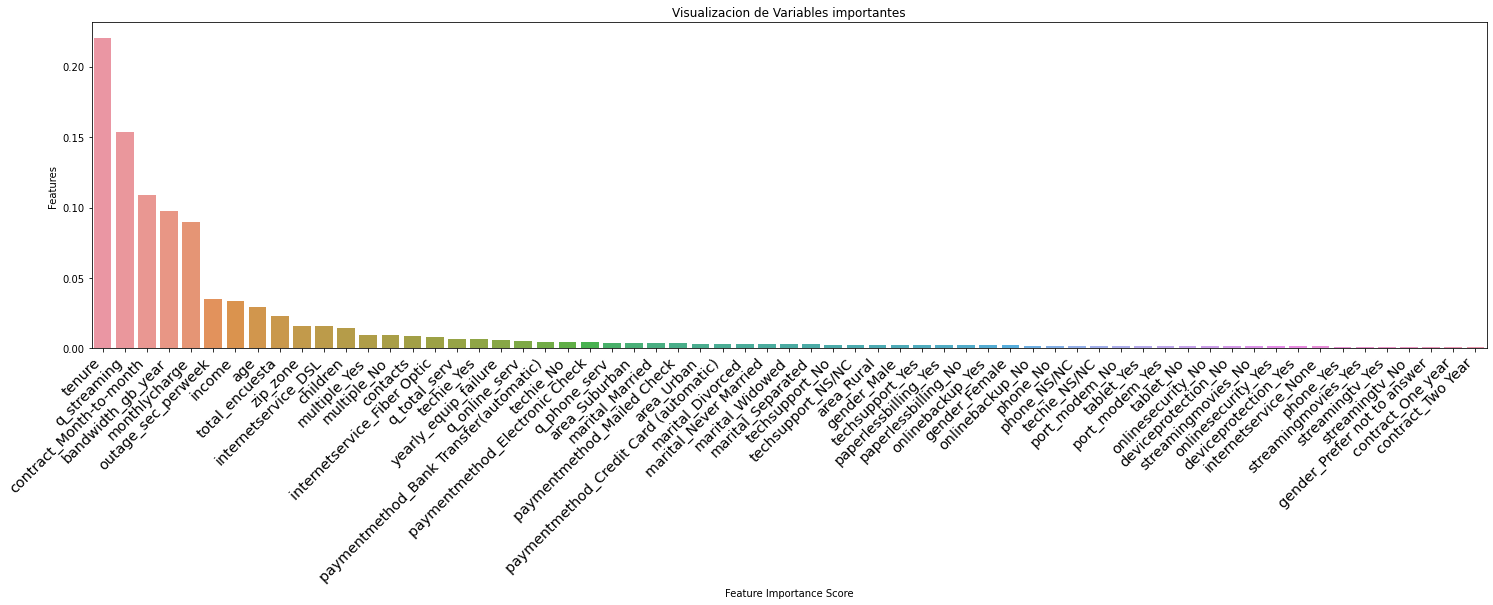

In [70]:
#Visualizamos características importantes:

#Crear un diagrama de barras

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

#Agregar estiquetas:



plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizacion de Variables importantes")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
);

plt.gcf().set_size_inches(25, 6)